In [1]:
import h5py
import numpy as np
import Szekeres as sz
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from data_analysis_codes.tools import Cstyle
from data_analysis_codes.tools import FD as FD_file
from data_analysis_codes.tools import Ricci_CoGrad_Weyl as RCW_file
plt.style.use(Cstyle.style1)

In [2]:
# redshift
z = (sz.a_today/sz.a) - 1
z

230.63977176581454

In [2]:
FD = FD_file.FD_Class(sz.dx, periodic_boundary=False, order6=True)
RCW = RCW_file.Ricci_CoGrad_Weyl_Class(FD)
Gudd = RCW.Christoffel_symbol(sz.gdown, sz.gup)
RicciTdown, RicciS3 = RCW.Ricci_TandS(sz.gup, Gudd)
LCuud3 = np.einsum('ae...,bf...,efc...->abc...', sz.gup, sz.gup, RCW.LeviCivita4(sz.gdown4)[0,1:,1:,1:])
Bdict = RCW.Weyl_B(sz.gdown, sz.gup, sz.uup, LCuud3, Gudd, sz.Kdown)
B2S = Bdict['B2']
Edict = RCW.Weyl_E(sz.gdown, sz.gup, LCuud3, Gudd, RicciS3, RicciTdown, sz.Kdown, sz.kappa, sz.Tdown3)
E2S = Edict['E2']
invar_dict = RCW.Weyl_Invar(sz.gdown, Edict, Bdict)
LBinv = invar_dict['LB']
Minv = invar_dict['M']
Iinv = invar_dict['I']
Jinv = invar_dict['J']
Sinv = invar_dict['S']
Kinv = invar_dict['K']
LSinv = invar_dict['LS']
Ninv = invar_dict['N']

dt = sz.dx*0.05
tIN = sz.t-8*dt
tF = sz.t+8*dt
it = np.argmin(abs(np.arange(tIN, tF, dt)-sz.t))
fname = '/home/robynm/simulations/Geometrical/Szekeres_N'+str(sz.N)+'/EBWeyl/it={:06d}.hdf5'.format(it)
f = h5py.File(fname, 'r')
RicciS4 = np.array(f['RicciS4'])

In [4]:
spacetimenamesize = 31
iH2 = 1 / (sz.Hprop * sz.Hprop)
i = 32
cc = sz.xyz/sz.L
cc = cc[4:-4]

def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'${}.10^{{{}}}$'.format(a, b)

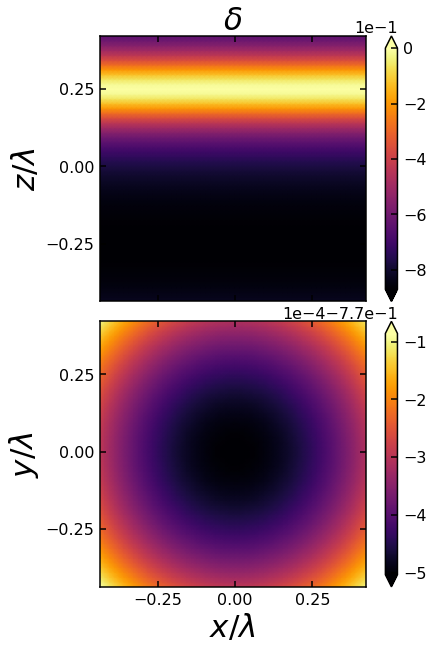

In [5]:
i = 32
cc = sz.xyz/sz.L
cc = cc[4:-4]

fig = plt.figure(figsize=(6, 9))
ax1 = fig.add_subplot(211)
im1 = ax1.pcolormesh(cc, cc, sz.delta[4:-4,i,4:-4].T, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im1, extend='both')
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([1e0, 1e-6, 1e-12, 1e-18, 1e-24])
cd.update_ticks()
ax1.set_yticks([-0.25, 0, 0.25])
ax1.set_xticks([-0.25, 0, 0.25])
ax1.set_xticklabels([])
ax1.set_ylabel(r'$z/\lambda$', size=spacetimenamesize)
ax1.set_title(r'$\delta$', size=spacetimenamesize)
ax1.set_aspect("equal")

ax2 = fig.add_subplot(212)
im2 = ax2.pcolormesh(cc, cc, sz.delta[4:-4,4:-4,i].T, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im2, extend='both')
cd.formatter.set_useOffset(-0.770)
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([0.03471, 0.03472, 0.03473, 0.03474])
cd.update_ticks()
ax2.set_yticks([-0.25, 0, 0.25])
ax2.set_xticks([-0.25, 0, 0.25])
ax2.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax2.set_ylabel(r'$y/\lambda$', size=spacetimenamesize)
ax2.set_aspect("equal")
fig.subplots_adjust(hspace=0.075, right=1.01, left=0.09, top=0.94, bottom=0.09)
plt.savefig('Plots/Szekeresdelta.pdf')

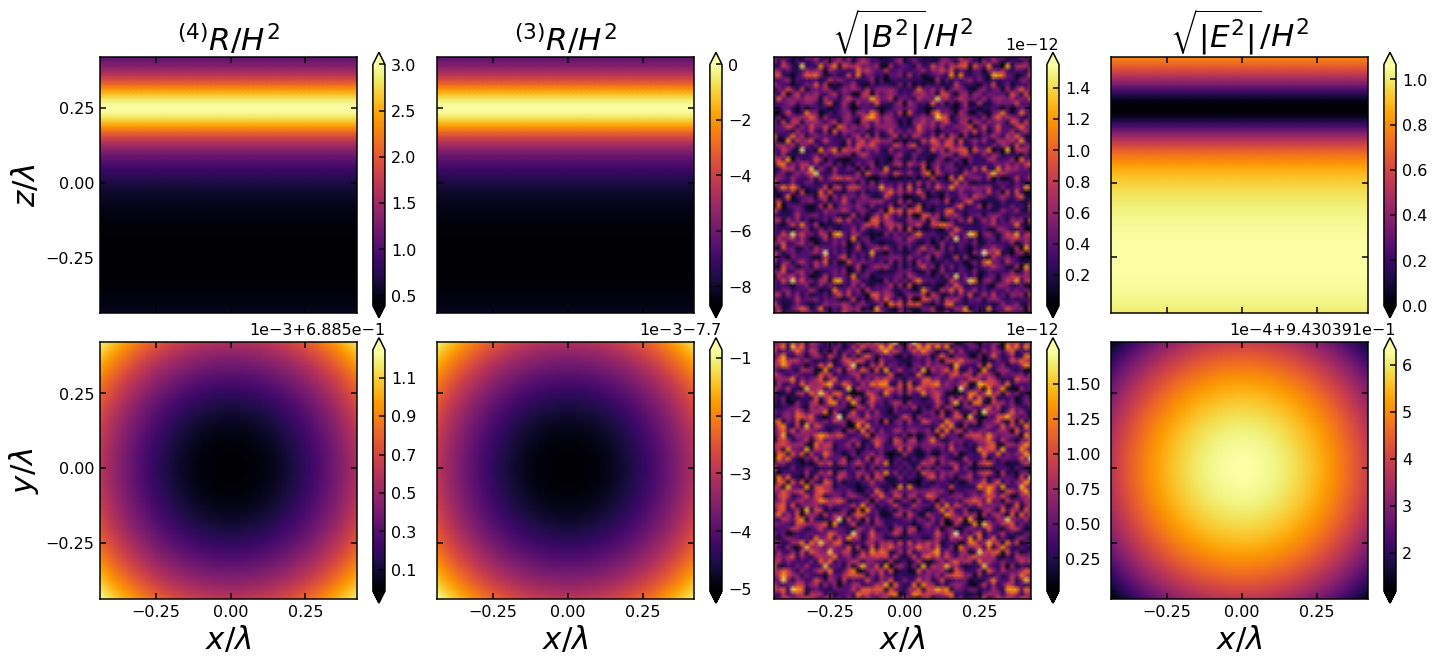

In [28]:
fig = plt.figure(figsize=(20, 9))
ax1 = fig.add_subplot(241)
im1 = ax1.pcolormesh(cc, cc, RicciS4[4:-4,i,4:-4].T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im1, extend='both')
#cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([0.1, 0.2, 0.3, 0.4, 0.5])
#cd.update_ticks()
ax1.set_ylabel(r'$z/\lambda$', size=spacetimenamesize)
ax1.set_yticks([-0.25, 0, 0.25])
ax1.set_xticks([-0.25, 0, 0.25])
ax1.set_xticklabels([])
ax1.set_title(r'${}^{(4)}R/H^2$', size=spacetimenamesize)
ax1.set_aspect("equal")
ax5 = fig.add_subplot(245)
im5 = ax5.pcolormesh(cc, cc, RicciS4[4:-4,4:-4,i].T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im5, extend='both')
cd.formatter.set_useOffset(0.6885)
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([0.1360, 0.13605, 0.1361, 0.13615, 0.1362])
cd.update_ticks()
ax5.set_yticks([-0.25, 0, 0.25])
ax5.set_xticks([-0.25, 0, 0.25])
ax5.set_ylabel(r'$y/\lambda$', size=spacetimenamesize)
ax5.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax5.set_aspect("equal")

ax2 = fig.add_subplot(242)
im2 = ax2.pcolormesh(cc, cc, RicciS3[4:-4,i,4:-4].T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im2, extend='both')
#cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([-1.5, -1, -0.5, 0])
#cd.update_ticks()
ax2.set_yticks([-0.25, 0, 0.25])
ax2.set_xticks([-0.25, 0, 0.25])
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_title(r'${}^{(3)}R/H^2$', size=spacetimenamesize)
ax2.set_aspect("equal")
ax6 = fig.add_subplot(246)
im6 = ax6.pcolormesh(cc, cc, RicciS3[4:-4,4:-4,i].T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im6, extend='both')
cd.formatter.set_useOffset(-7.7)
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([-1.5218, -1.5216, -1.5214, -1.5212])
cd.update_ticks()
ax6.set_yticks([-0.25, 0, 0.25])
ax6.set_xticks([-0.25, 0, 0.25])
ax6.set_yticklabels([])
ax6.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax6.set_aspect("equal")

ax3 = fig.add_subplot(243)
im3 = ax3.pcolormesh(cc, cc, np.sqrt(abs(B2S[4:-4,i,4:-4].T)) *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im3, extend='both')
#cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([1e-26, -1e-26, -3e-26, -5e-26, -7e-26])
#cd.update_ticks()
ax3.set_yticks([-0.25, 0, 0.25])
ax3.set_xticks([-0.25, 0, 0.25])
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_title(r'$\sqrt{|B^2|}/H^2$', size=spacetimenamesize)
ax3.set_aspect("equal")
ax7 = fig.add_subplot(247)
im7 = ax7.pcolormesh(cc, cc, np.sqrt(abs(B2S[4:-4,4:-4,i].T)) *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im7, extend='both')
#cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([0, -0.3e-25, -0.6e-25, -0.9e-25])
#cd.update_ticks()
ax7.set_yticks([-0.25, 0, 0.25])
ax7.set_xticks([-0.25, 0, 0.25])
ax7.set_yticklabels([])
ax7.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax7.set_aspect("equal")

ax4 = fig.add_subplot(244)
im4 = ax4.pcolormesh(cc, cc, np.sqrt(abs(E2S[4:-4,i,4:-4].T)) *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im4, extend='both')
#cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([0.01, 0.02, 0.03, 0.04])
#cd.update_ticks()
ax4.set_yticks([-0.25, 0, 0.25])
ax4.set_xticks([-0.25, 0, 0.25])
ax4.set_yticklabels([])
ax4.set_xticklabels([])
ax4.set_title(r'$\sqrt{|E^2|}/H^2$', size=spacetimenamesize)
ax4.set_aspect("equal")
ax8 = fig.add_subplot(248)
im8 = ax8.pcolormesh(cc, cc, np.sqrt(abs(E2S[4:-4,4:-4,i].T)) *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im8, extend='both')
offsetval = 0.9430391
cd.formatter.set_useOffset(offsetval)
cd.formatter.set_powerlimits((0, 1))
cd.set_ticks([offsetval+2e-4, offsetval+3e-4, offsetval+4e-4, offsetval+5e-4, offsetval+6e-4])
cd.update_ticks()
ax8.set_yticks([-0.25, 0, 0.25])
ax8.set_xticks([-0.25, 0, 0.25])
ax8.set_yticklabels([])
ax8.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax8.set_aspect("equal")

fig.subplots_adjust(hspace=0.075, wspace=0.05, left=0.065, right=0.99 ,top=0.93,bottom=0.08)

plt.savefig('Plots/Szekeresinv0.pdf')

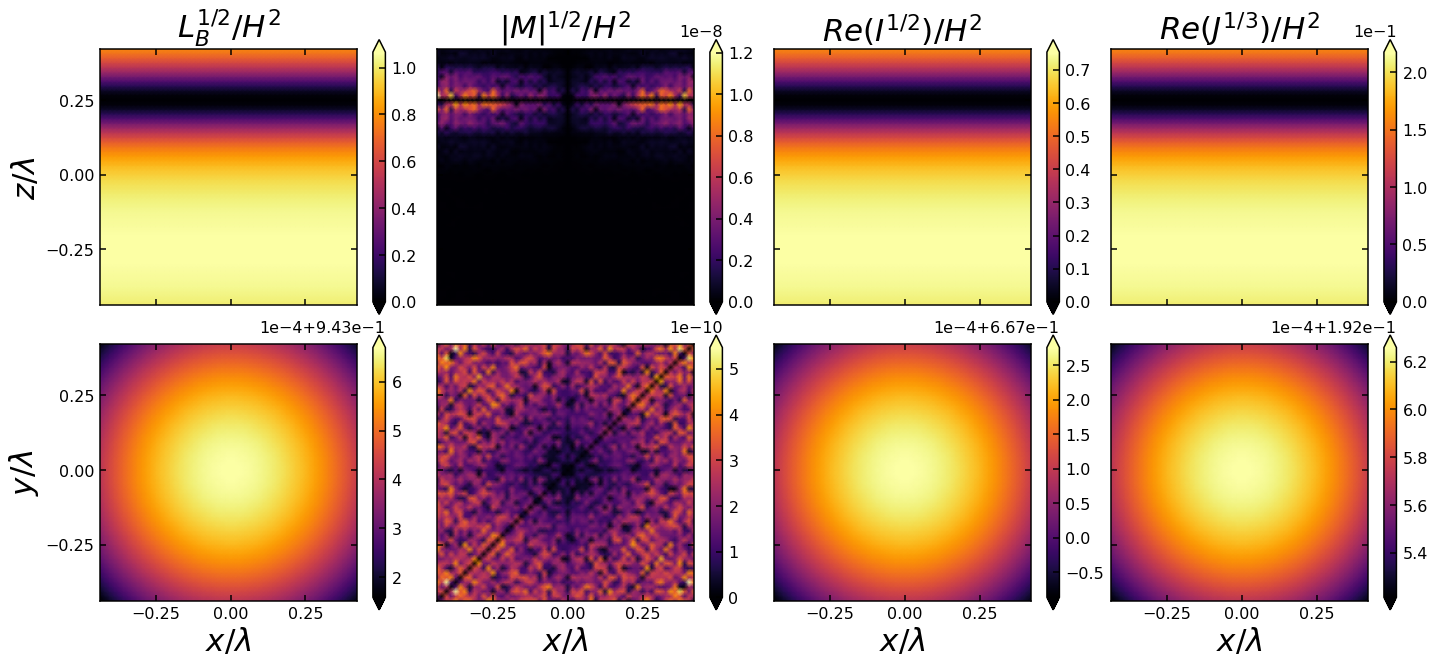

In [29]:
fig = plt.figure(figsize=(20, 9))
ax1 = fig.add_subplot(241)
im1 = ax1.pcolormesh(cc, cc, (LBinv[4:-4,i,4:-4]**(1/2)).T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im1, extend='both')
#cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([0.1, 0.2, 0.3, 0.4, 0.5])
#cd.update_ticks()
ax1.set_ylabel(r'$z/\lambda$', size=spacetimenamesize)
ax1.set_yticks([-0.25, 0, 0.25])
ax1.set_xticks([-0.25, 0, 0.25])
ax1.set_xticklabels([])
ax1.set_title(r'$L_{B}^{1/2}/H^2$', size=spacetimenamesize)
ax1.set_aspect("equal")
ax5 = fig.add_subplot(245)
im5 = ax5.pcolormesh(cc, cc, (LBinv[4:-4,4:-4,i]**(1/2)).T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im5, extend='both')
ofv = 0.943
cd.formatter.set_useOffset(ofv)
cd.formatter.set_powerlimits((0, 1))
cd.set_ticks([ofv+2e-4, ofv+3e-4, ofv+4e-4, ofv+5e-4, ofv+6e-4])
cd.update_ticks()
ax5.set_yticks([-0.25, 0, 0.25])
ax5.set_xticks([-0.25, 0, 0.25])
ax5.set_ylabel(r'$y/\lambda$', size=spacetimenamesize)
ax5.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax5.set_aspect("equal")

ax2 = fig.add_subplot(242)
im2 = ax2.pcolormesh(cc, cc, (abs(Minv[4:-4,i,4:-4])**(1/2)).T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im2, extend='both')
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([-1.5, -1, -0.5, 0])
#cd.update_ticks()
ax2.set_yticks([-0.25, 0, 0.25])
ax2.set_xticks([-0.25, 0, 0.25])
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_title(r'$|M|^{1/2}/H^2$', size=spacetimenamesize)
ax2.set_aspect("equal")
ax6 = fig.add_subplot(246)
im6 = ax6.pcolormesh(cc, cc, (abs(Minv[4:-4,4:-4,i])**(1/2)).T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im6, extend='both')
#cd.formatter.set_useOffset(-1.521)
#cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([-1.5218, -1.5216, -1.5214, -1.5212])
#cd.update_ticks()
ax6.set_yticks([-0.25, 0, 0.25])
ax6.set_xticks([-0.25, 0, 0.25])
ax6.set_yticklabels([])
ax6.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax6.set_aspect("equal")

ax3 = fig.add_subplot(243)
im3 = ax3.pcolormesh(cc, cc, (Iinv[4:-4,i,4:-4]**(1/2)).real.T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im3, extend='both')
#cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([1e-26, -1e-26, -3e-26, -5e-26, -7e-26])
#cd.update_ticks()
ax3.set_yticks([-0.25, 0, 0.25])
ax3.set_xticks([-0.25, 0, 0.25])
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_title(r'$Re(I^{1/2})/H^2$', size=spacetimenamesize)
ax3.set_aspect("equal")
ax7 = fig.add_subplot(247)
im7 = ax7.pcolormesh(cc, cc, (Iinv[4:-4,4:-4,i]**(1/2)).real.T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im7, extend='both')
cd.formatter.set_useOffset(0.667)
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([0.017355, 0.01736, 0.017365, 0.01737])
cd.update_ticks()
ax7.set_yticks([-0.25, 0, 0.25])
ax7.set_xticks([-0.25, 0, 0.25])
ax7.set_yticklabels([])
ax7.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax7.set_aspect("equal")

ax1 = fig.add_subplot(244)
im1 = ax1.pcolormesh(cc, cc, (Jinv[4:-4,i,4:-4]**(1/3)).real.T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im1, extend='both')
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([0e-4, -2e-4, -4e-4, -6e-4])
cd.update_ticks()
#ax1.set_ylabel(r'$z/L$', size=spacetimenamesize)
ax1.set_yticks([-0.25, 0, 0.25])
ax1.set_xticks([-0.25, 0, 0.25])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_title(r'$Re(J^{1/3})/H^2$', size=spacetimenamesize)
ax1.set_aspect("equal")
ax5 = fig.add_subplot(248)
im5 = ax5.pcolormesh(cc, cc, (Jinv[4:-4,4:-4,i]**(1/3)).real.T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im5, extend='both')
cd.formatter.set_useOffset(0.192)
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([-4.4e-4+0e-7, -4.4e-4-2e-7, -4.4e-4-4e-7, -4.4e-4-6e-7])
cd.update_ticks()
ax5.set_yticks([-0.25, 0, 0.25])
ax5.set_xticks([-0.25, 0, 0.25])
ax5.set_yticklabels([])
#ax5.set_ylabel(r'$y/L$', size=spacetimenamesize)
ax5.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax5.set_aspect("equal")

fig.subplots_adjust(hspace=0.075, wspace=0.05, left=0.065, right=0.99 ,top=0.95,bottom=0.07)

plt.savefig('Plots/Szekeresinv1bis.pdf')

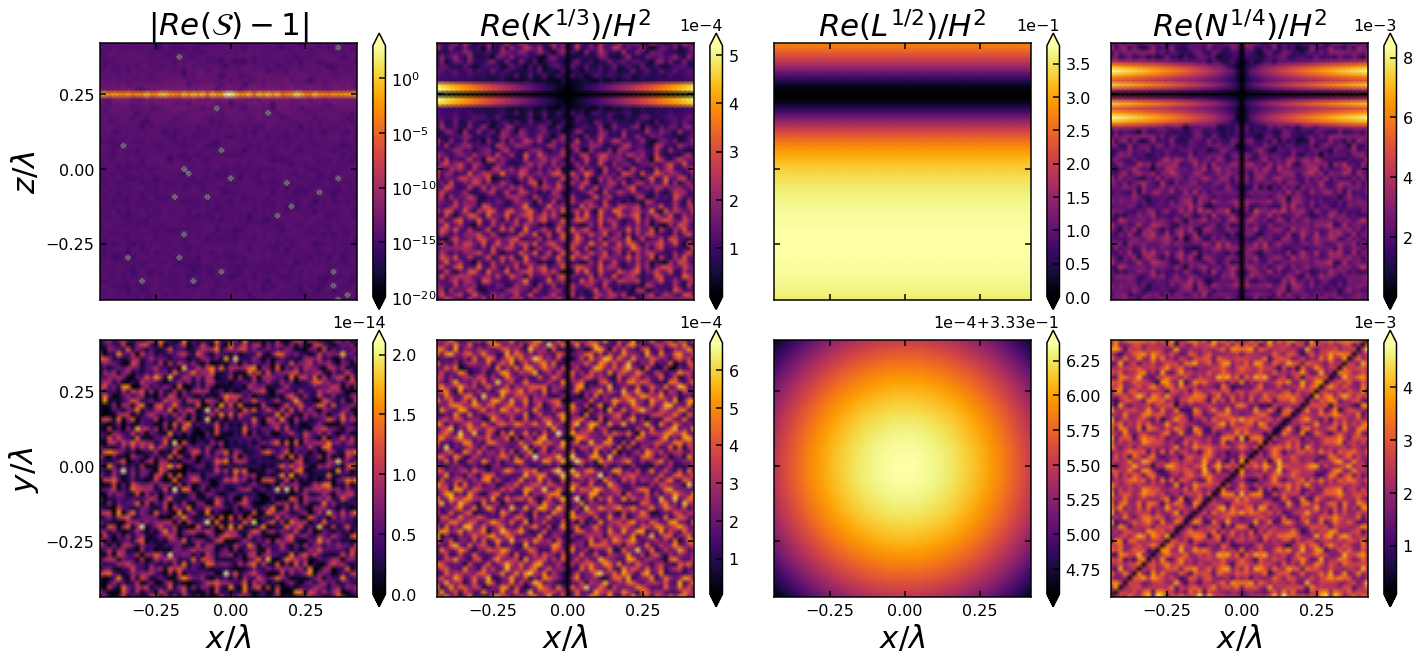

In [30]:

fig = plt.figure(figsize=(20, 9))
ax3 = fig.add_subplot(241)
vmin = 1e-20
vmax = 1e3
im3 = ax3.pcolormesh(cc, cc, abs(Sinv[4:-4,i,4:-4].real.T-1), norm=LogNorm(vmin=vmin, vmax=vmax), cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im3, extend='both')
#cd.formatter.set_useOffset(1.0)
#cd.formatter.set_powerlimits((0, 1))
cd.set_ticks([1, 1e-5, 1e-10, 1e-15, 1e-20])
cd.update_ticks()
ax3.set_yticks([-0.25, 0, 0.25])
ax3.set_xticks([-0.25, 0, 0.25])
ax3.set_ylabel(r'$z/\lambda$', size=spacetimenamesize)
ax3.set_xticklabels([])
ax3.set_title(r'$|Re(\mathcal{S})-1|$', size=spacetimenamesize)
ax3.set_aspect("equal")
ax7 = fig.add_subplot(245)
im7 = ax7.pcolormesh(cc, cc, abs(Sinv[4:-4,4:-4,i].real.T-1), cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im7, extend='both')
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([1.0-1.50000e-14, 1.0-0.750000e-14, 1.0, 1.0+0.750000e-14, 1.0+1.50000e-14])
cd.update_ticks()
ax7.set_yticks([-0.25, 0, 0.25])
ax7.set_xticks([-0.25, 0, 0.25])
ax7.set_ylabel(r'$y/\lambda$', size=spacetimenamesize)
ax7.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax7.set_aspect("equal")
    

ax1 = fig.add_subplot(242)
im1 = ax1.pcolormesh(cc, cc, (Kinv[4:-4,i,4:-4]**(1/3)).real.T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im1, extend='both')
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([0e-4, -2e-4, -4e-4, -6e-4])
cd.update_ticks()
#ax1.set_ylabel(r'$z/L$', size=spacetimenamesize)
ax1.set_yticks([-0.25, 0, 0.25])
ax1.set_xticks([-0.25, 0, 0.25])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_title(r'$Re(K^{1/3})/H^2$', size=spacetimenamesize)
ax1.set_aspect("equal")
ax5 = fig.add_subplot(246)
im5 = ax5.pcolormesh(cc, cc, (Kinv[4:-4,4:-4,i]**(1/3)).real.T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im5, extend='both')
#cd.formatter.set_useOffset(-0.0571)
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([-4.4e-4+0e-7, -4.4e-4-2e-7, -4.4e-4-4e-7, -4.4e-4-6e-7])
cd.update_ticks()
ax5.set_yticks([-0.25, 0, 0.25])
ax5.set_xticks([-0.25, 0, 0.25])
ax5.set_yticklabels([])
#ax5.set_ylabel(r'$y/L$', size=spacetimenamesize)
ax5.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax5.set_aspect("equal")

ax3 = fig.add_subplot(243)
im3 = ax3.pcolormesh(cc, cc, (LSinv[4:-4,i,4:-4]**(1/2)).real.T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im3, extend='both')
#cd.formatter.set_useOffset(1.0)
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([1, 1e-5, 1e-10, 1e-15, 1e-20])
cd.update_ticks()
ax3.set_yticks([-0.25, 0, 0.25])
ax3.set_xticks([-0.25, 0, 0.25])
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_title(r'$Re(L^{1/2})/H^2$', size=spacetimenamesize)
ax3.set_aspect("equal")
ax7 = fig.add_subplot(247)
im7 = ax7.pcolormesh(cc, cc, (LSinv[4:-4,4:-4,i]**(1/2)).real.T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im7, extend='both')
cd.formatter.set_powerlimits((0, 1))
cd.formatter.set_useOffset(0.333)
#cd.set_ticks([1.0-1.50000e-14, 1.0-0.750000e-14, 1.0, 1.0+0.750000e-14, 1.0+1.50000e-14])
cd.update_ticks()
ax7.set_yticks([-0.25, 0, 0.25])
ax7.set_xticks([-0.25, 0, 0.25])
ax7.set_yticklabels([])
ax7.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax7.set_aspect("equal")

ax1 = fig.add_subplot(244)
im1 = ax1.pcolormesh(cc, cc, (Ninv[4:-4,i,4:-4]**(1/4)).real.T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im1, extend='both')
#cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([0e-4, -2e-4, -4e-4, -6e-4])
cd.formatter.set_powerlimits((0, 1))
cd.update_ticks()
#ax1.set_ylabel(r'$z/L$', size=spacetimenamesize)
ax1.set_yticks([-0.25, 0, 0.25])
ax1.set_xticks([-0.25, 0, 0.25])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_title(r'$Re(N^{1/4})/H^2$', size=spacetimenamesize)
ax1.set_aspect("equal")
ax5 = fig.add_subplot(248)
im5 = ax5.pcolormesh(cc, cc, (Ninv[4:-4,4:-4,i]**(1/4)).real.T *iH2, cmap=plt.cm.get_cmap('inferno'), shading='gouraud')
cd = fig.colorbar(im5, extend='both')
#cd.formatter.set_useOffset(-0.0571)
cd.formatter.set_powerlimits((0, 1))
#cd.set_ticks([-4.4e-4+0e-7, -4.4e-4-2e-7, -4.4e-4-4e-7, -4.4e-4-6e-7])
cd.update_ticks()
ax5.set_yticks([-0.25, 0, 0.25])
ax5.set_xticks([-0.25, 0, 0.25])
ax5.set_yticklabels([])
#ax5.set_ylabel(r'$y/L$', size=spacetimenamesize)
ax5.set_xlabel(r'$x/\lambda$', size=spacetimenamesize)
ax5.set_aspect("equal")

fig.subplots_adjust(hspace=0.075, wspace=0.05, left=0.065, right=0.99 ,top=0.955,bottom=0.07)

plt.savefig('Plots/Szekeresinv3bis.pdf')